<a href="https://colab.research.google.com/github/nilesh0109/ML_SoSe19/blob/master/Gaussian_processes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [0]:
x = np.random.randn(100,3) * 10
X,y = x[:,0:2], x[:,2]

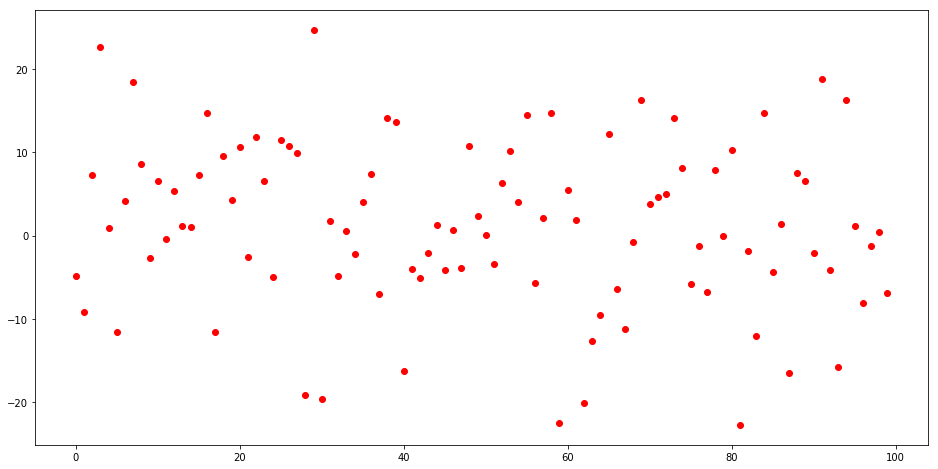

In [63]:
plt.figure(figsize=(16,8))
plt.plot(y, 'ro')

In [0]:
def plot_pred(X, y, pred):
  plt.clf()
  plt.figure(figsize=(16,8))
  plt.plot(y, 'bo')
  plt.plot(pred, 'go')
  plt.plot( pred)
  plt.show()

def fit_linear_model(X, y):
  linear_model = LinearRegression()
  if X.ndim < 2:
    X = X.reshape(-1,1)
  linear_model.fit(X, y)

  pred_y = linear_model.predict(X)
  print('MSE is ', np.mean(np.square(pred_y - y)))
  print(linear_model.intercept_, linear_model.coef_)
  plot_pred(X, y, pred_y)

# Fitting Linear Model

MSE is  95.48864472480496
1.4658257717382912 [0.11926093 0.16581692]


<Figure size 432x288 with 0 Axes>

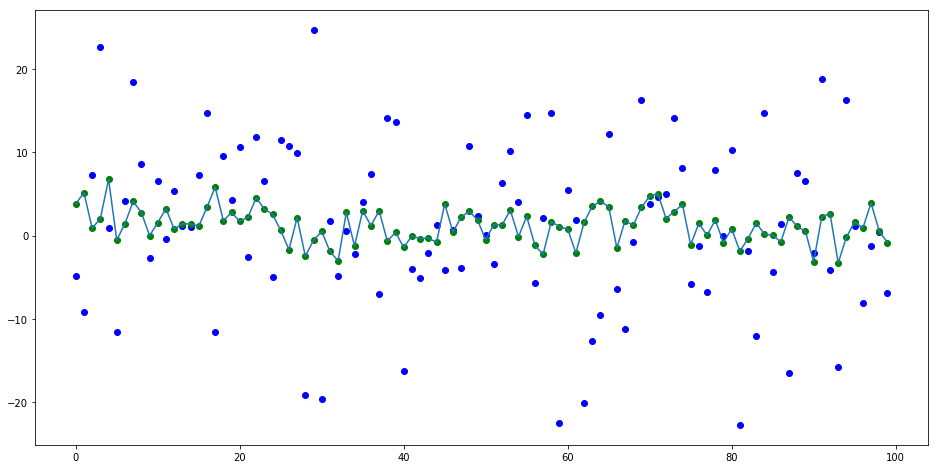

In [89]:
fit_linear_model(X, y)

MSE is  2.060876966695533e-29
1.5543122344752192e-15 [-7.00354441e-17  1.11022302e-16  1.00000000e+00]


<Figure size 432x288 with 0 Axes>

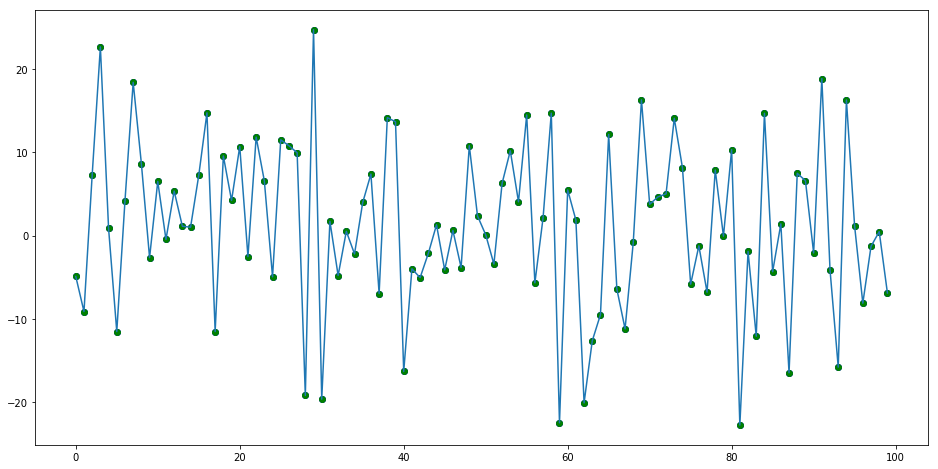

In [90]:
fit_linear_model(x,y)

# polynomial Features

MSE is  17.721474741338646
0.6213785056388546 [ 7.16649585e-09  5.34863005e-09 -1.24553007e-09 -5.86120831e-10
  5.25951932e-10  6.24471797e-11  1.72462754e-10 -9.13681185e-11
  1.37583409e-10 -1.82919872e-10 -7.42212266e-10  1.13356100e-09
 -3.69087743e-10  8.16846575e-10 -1.92618321e-09 -3.34809131e-11
 -1.55145026e-09  2.65865568e-09 -2.95331381e-09  4.00714302e-09
 -4.05169551e-09 -2.36978066e-08  2.95993220e-08 -6.67452636e-09
  1.13273783e-08 -6.04303483e-09  1.39381434e-08 -6.22719679e-08
 -3.57545796e-08  1.36841243e-08  5.47804517e-08 -2.69565453e-08
  3.98832792e-08 -6.78165032e-08  8.69293810e-08 -7.76276135e-08
 -4.92680353e-07  6.06468468e-07 -1.50879005e-07  1.86568276e-07
  6.88480761e-08  6.66394683e-08 -1.52085227e-07  2.03412178e-07
 -1.37389643e-06 -6.43664362e-07  1.65549684e-06  1.21012345e-06
  1.68194926e-07  4.77807426e-07 -3.07878592e-07  4.89920034e-07
 -1.23349942e-06  1.27016780e-06 -7.55533123e-07  6.04491031e-08
  3.91153342e-08 -2.16654967e-06  1.72824427

<Figure size 432x288 with 0 Axes>

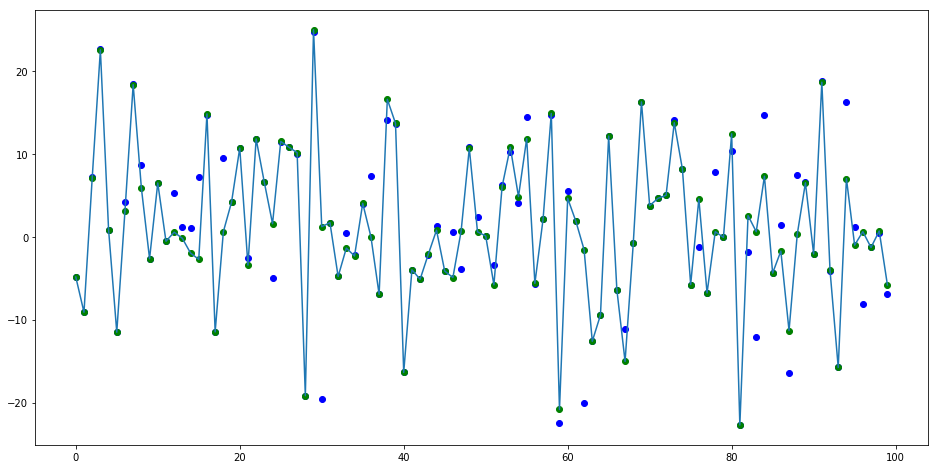

In [91]:
p = PolynomialFeatures(15)
x_poly = p.fit_transform(X)
fit_linear_model(x_poly,y)

# Gaussian Model

In [0]:
from sklearn.gaussian_process.kernels import RBF

MSE is  7.285279237804248e-28
0.4768051493403096 [ -3.70453041 -35.01725602  12.71398603  17.13672072   0.39511398
 -13.35477607  -3.64996578  30.04782054  19.64000533  -3.02999344
   6.02829286  -0.93212729  50.32578393 -12.23381385  26.55700646
  15.18852734  15.1144123  -11.97301221  11.29889223   3.21787547
  10.18453993  -2.458003    11.45093049   5.66730627 -11.93168653
  11.04103734  14.78142542   7.43405245 -19.71662231  24.94733494
 -37.51014036   2.13735893  -4.15228216 -13.59409801   2.61569647
   3.67822412  14.44697998  -7.41681211  27.30673331  14.27167404
 -19.69523149  -3.02676542  -9.70660194   6.53207615  -6.5103567
  -6.64667734  18.74239876  -3.09464713  10.04531113  -0.96501622
  -0.36465699 -24.45435535   9.33828936  10.13214133   1.41474985
  75.89562164  -7.66495122   1.80237     14.32917279 -29.18215508
   2.53686554   1.95545021 -20.02361335 -13.08016839 -24.63407904
  10.26523832  -7.10158458  -7.8458089   -1.26918882  15.83140738
   2.61445197  32.0047117   

<Figure size 432x288 with 0 Axes>

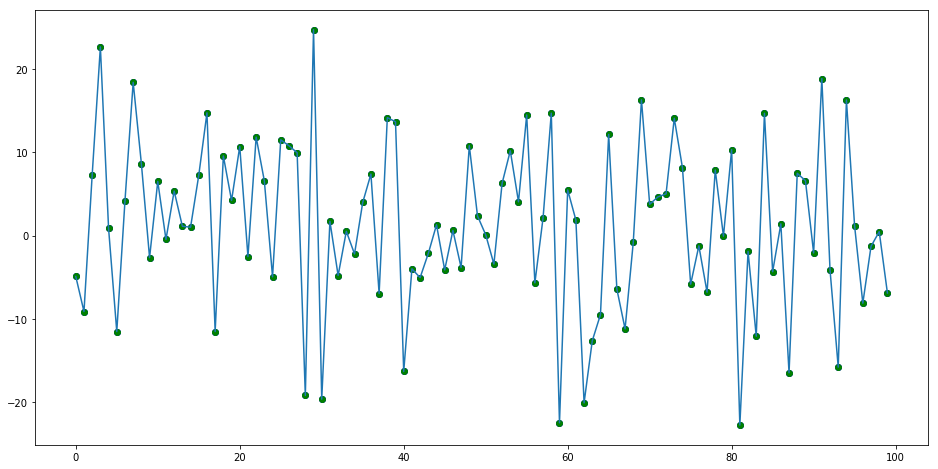

In [93]:
_k = RBF(1)
kernal_data = X.copy()
X_rbf = k.__call__(kernal_data)
fit_linear_model(X_rbf, y)

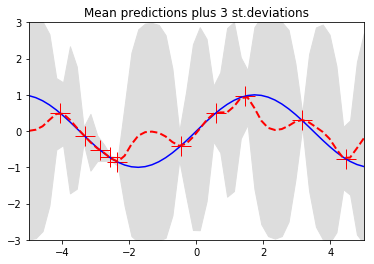

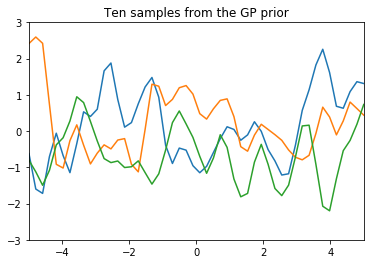

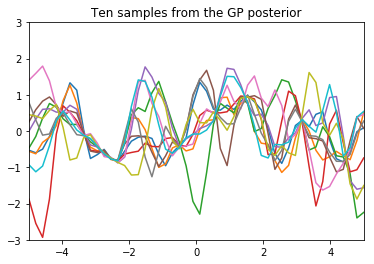

In [94]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as pl

""" This is code for simple GP regression. It assumes a zero mean GP Prior """


# This is the true unknown function we are trying to approximate
f = lambda x: np.sin(0.9*x).flatten()
#f = lambda x: (0.25*(x**2)).flatten()


# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 0.1
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

N = 10         # number of training points.
n = 50         # number of test points.
s = 0.00005    # noise variance.

# Sample some input points and noisy versions of the function evaluated at
# these points. 
X = np.random.uniform(-5, 5, size=(N,1))
y = f(X) + s*np.random.randn(N)

K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))

# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, y))

# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)


# PLOTS:
pl.figure(1)
pl.clf()
pl.plot(X, y, 'r+', ms=20)
pl.plot(Xtest, f(Xtest), 'b-')
pl.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.savefig('predictive.png', bbox_inches='tight')
pl.title('Mean predictions plus 3 st.deviations')
pl.axis([-5, 5, -3, 3])

# draw samples from the prior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,3)))
pl.figure(2)
pl.clf()
pl.plot(Xtest, f_prior)
pl.title('Ten samples from the GP prior')
pl.axis([-5, 5, -3, 3])
pl.savefig('prior.png', bbox_inches='tight')

# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,10)))
pl.figure(3)
pl.clf()
pl.plot(Xtest, f_post)
pl.title('Ten samples from the GP posterior')
pl.axis([-5, 5, -3, 3])
pl.savefig('post.png', bbox_inches='tight')

pl.show()